<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L07_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering Practice**

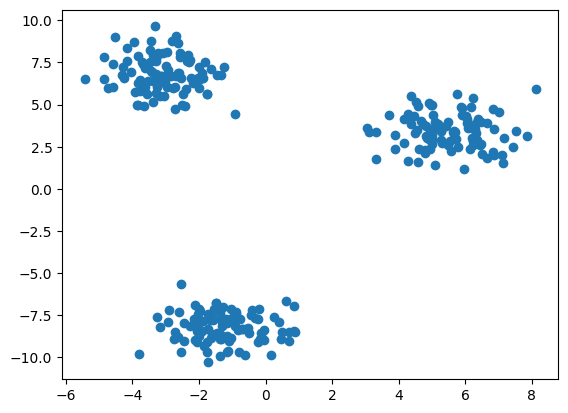

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0)
# X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
# X, y = make_moons(n_samples=300, noise=0.05)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
y # 정답임. K-Means Clustering으로 맞춰보자

array([2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2,
       2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0,
       1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0,
       1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0,
       2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1])

In [4]:
import numpy as np
from numpy.linalg import norm

class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers = None
        self.labels_ = None
        self.inertia_ = None

    def fit(self,X):
        # 초기 중심점 설정 (forgy method)
        self.cluster_centers_ = X[np.random.choice(range(len(X)), self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # 각 데이터 포인트와 중심점 사이의 거리 계산 및 할당
            distances = norm((X[:, np.newaxis] - self.cluster_centers_), axis = 2) # np.newaxis 대신 None 써도 됨.
            self.labels_ = np.argmin(distances, axis=1)

            # 새로운 중심점 계산
            cluster_centers = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            # 변화가 없을 경우 종료
            if np.all(self.cluster_centers_ == cluster_centers):
                break

            self.cluster_centers_ = cluster_centers

        # 분산 계산
        self.inertia_ = np.sum(distances[np.arange(len(distances)), self.labels_] ** 2 )

    def predict(self, X):
        distances = norm(X[:, None] - self.cluster_centers, axis = 2)
        return np.argmin(distances, axis=1)

### **Model Test**


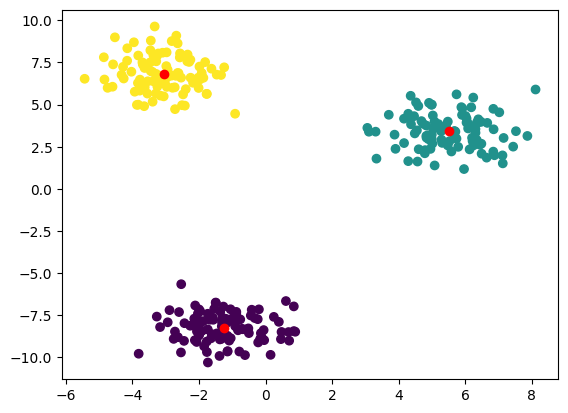

In [5]:
model = KMeans(n_clusters=3)
model.fit(X)

plt.scatter(X[:,0], X[:,1], c = model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'red')
plt.show()

## **K-Means Clustering with Scikit-learn**

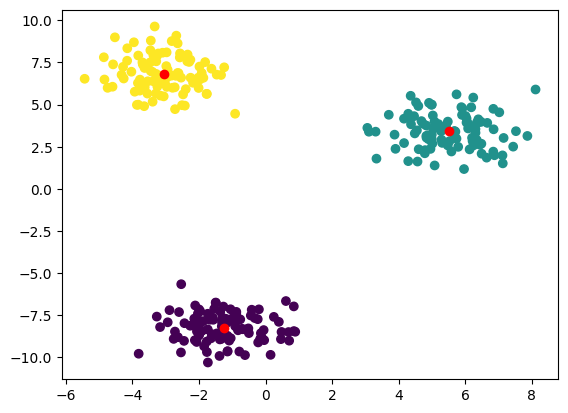

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

plt.scatter(X[:,0], X[:,1], c = model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'red')
plt.show()

<br>

## **이미지 처리 응용**

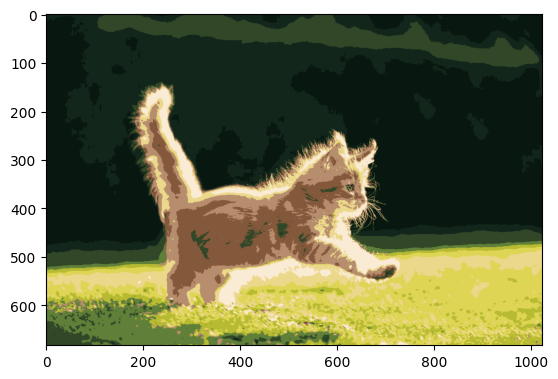

In [41]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# RGBA 이미지 열기
img = Image.open("test_image.png")

# RGB로 변환
img_rgb = img.convert("RGB")

# 이미지 크기 저장
width, height = img_rgb.size

# NumPy 배열로 변환
img_arr = np.array(img_rgb)
pixels = img_arr.reshape(-1, 3)

# KMeans 클러스터링
model = KMeans(n_clusters=10)
model.fit(pixels)

# 클러스터링 결과로 이미지 재생성
for i in range(pixels.shape[0]):
    pixels[i] = model.cluster_centers_[model.labels_[i]]

new_img_arr = pixels.reshape(height, width, 3).astype(np.uint8)

plt.imshow(new_img_arr)
plt.show()

# Image.fromarray -> save하면 저장할 수 있음.